In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! git clone https://github.com/maulanaakbardj/Home-Agriculture-Monitoring-System

Cloning into 'Home-Agriculture-Monitoring-System'...
remote: Enumerating objects: 55487, done.
remote: Total 55487 (delta 0), reused 0 (delta 0), pack-reused 55487
Receiving objects: 100% (55487/55487), 871.17 MiB | 38.55 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Checking out files: 100% (42103/42103), done.


In [3]:
import os

In [4]:
mypath= '/content/Home-Agriculture-Monitoring-System/ML/Data/Apel/'

In [5]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
Busuk Hitam          621
Karat Apel Cedar     275
Keropeng Apel        630
Sehat               1645
dtype: int64

In [8]:
df.head()

,path,file_name,tag
0,/content/Home-Agriculture-Monitoring-System/ML...,d8b8a834-08df-43d9-8a1a-4bc8e508a1e3___FREC_Sc...,Keropeng Apel
1,/content/Home-Agriculture-Monitoring-System/ML...,4555c009-6c33-4913-accc-fd1a8355646b___FREC_Sc...,Keropeng Apel
2,/content/Home-Agriculture-Monitoring-System/ML...,058d5e64-2c57-45ba-94cb-ac83fd1885a0___FREC_Sc...,Keropeng Apel
3,/content/Home-Agriculture-Monitoring-System/ML...,83b1935d-f1fc-4b9f-876e-c0dbbb2fcb03___FREC_Sc...,Keropeng Apel
4,/content/Home-Agriculture-Monitoring-System/ML...,d7bdef33-fa84-4240-a931-8a568d62cee7___FREC_Sc...,Keropeng Apel


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X= df['path']
y= df['tag']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [12]:
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [13]:
df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [14]:
print('train size', len(df_tr))
print('val size', len(df_te))
print('test size', len(df_val))

train size 2536
val size 317
test size 318


In [15]:
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)



set         tag             
test        Busuk Hitam           64
            Karat Apel Cedar      22
            Keropeng Apel         59
            Sehat                172
train       Busuk Hitam          498
            Karat Apel Cedar     225
            Keropeng Apel        505
            Sehat               1308
validation  Busuk Hitam           59
            Karat Apel Cedar      28
            Keropeng Apel         66
            Sehat                165
dtype: int64 




,path,tag,set
713,/content/Home-Agriculture-Monitoring-System/ML...,Keropeng Apel,train
2602,/content/Home-Agriculture-Monitoring-System/ML...,Sehat,test
3139,/content/Home-Agriculture-Monitoring-System/ML...,Sehat,validation


In [16]:
import shutil
from tqdm.notebook import tqdm as tq

In [17]:
datasource_path = "/content/Home-Agriculture-Monitoring-System/ML/Data/Apel/"
dataset_path = "/content/Home-Agriculture-Monitoring-System/ML/Data/Apel/dataset/"

In [18]:
for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [19]:
import tensorflow as tf

In [20]:
# Define Input Parameters
dim = (150, 150)
# dim = (456, 456)
channel = (3, )
input_shape = dim + channel

#batch size
batch_size = 16

#Epoch
EPOCH = 10

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [23]:
train_generator = train_datagen.flow_from_directory('/content/Home-Agriculture-Monitoring-System/ML/Data/Apel/dataset/train',
                                                    target_size=dim,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('/content/Home-Agriculture-Monitoring-System/ML/Data/Apel/dataset/validation',
                                                target_size=dim,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory('/content/Home-Agriculture-Monitoring-System/ML/Data/Apel/dataset/test',
                                                  target_size=dim,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

num_class = test_generator.num_classes
labels = train_generator.class_indices.keys()

Found 2536 images belonging to 4 classes.
Found 318 images belonging to 4 classes.
Found 317 images belonging to 4 classes.


In [24]:
print(labels)

dict_keys(['Busuk Hitam', 'Karat Apel Cedar', 'Keropeng Apel', 'Sehat'])


In [25]:
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator


In [26]:
train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(val_generator, input_shape)

In [27]:
from tensorflow.keras.applications import Xception
# get base models
base_model = Xception(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet',
    classes=num_class,
)


83689472/83683744 [==============================] - 1s 0us/step


In [28]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model
#Adding custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1024, activation="relu")(x)
predictions = layers.Dense(num_class, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [29]:
# summarize the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [30]:
# Compile the model
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model.......


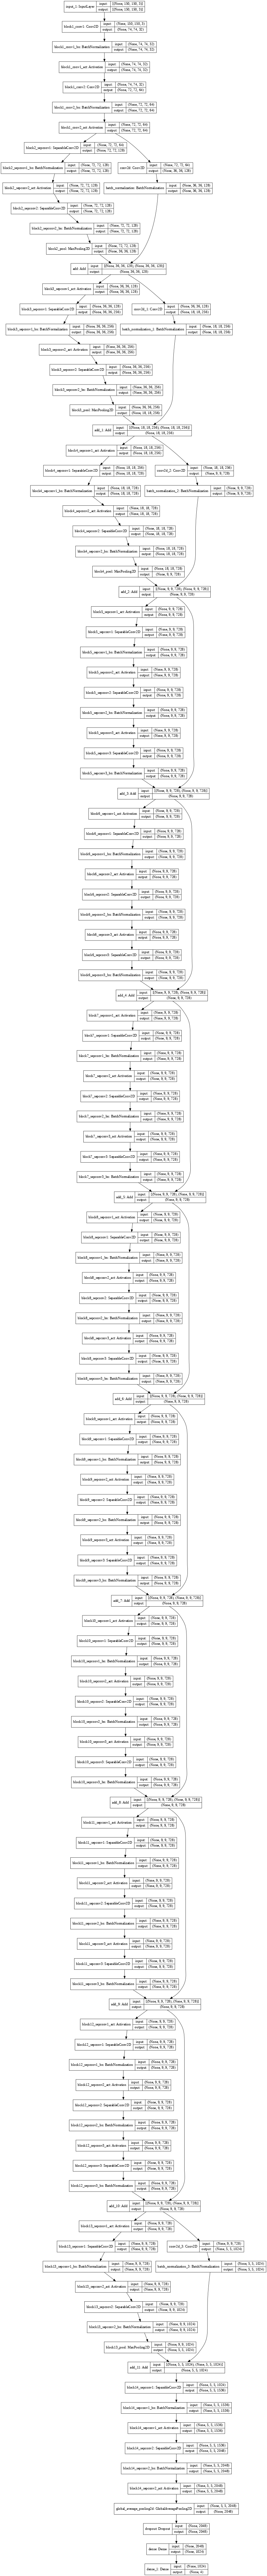

In [31]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model1.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [32]:
history = model.fit(x=train_data,
        steps_per_epoch=len(train_generator),
        epochs=EPOCH,
        validation_data=val_data,
        validation_steps=len(val_generator), 
        shuffle=True,
        verbose = 1)

Epoch 1/10
159/159 [==============================] - 76s 248ms/step - loss: 0.3821 - accuracy: 0.8837 - val_loss: 0.5461 - val_accuracy: 0.9245
Epoch 2/10
159/159 [==============================] - 38s 236ms/step - loss: 0.1686 - accuracy: 0.9523 - val_loss: 0.0631 - val_accuracy: 0.9874
Epoch 3/10
159/159 [==============================] - 38s 238ms/step - loss: 0.0993 - accuracy: 0.9740 - val_loss: 0.0693 - val_accuracy: 0.9748
Epoch 4/10
159/159 [==============================] - 38s 242ms/step - loss: 0.1066 - accuracy: 0.9692 - val_loss: 0.0972 - val_accuracy: 0.9623
Epoch 5/10
159/159 [==============================] - 38s 242ms/step - loss: 0.0663 - accuracy: 0.9779 - val_loss: 0.1344 - val_accuracy: 0.9371
Epoch 6/10
159/159 [==============================] - 38s 240ms/step - loss: 0.0300 - accuracy: 0.9937 - val_loss: 0.0063 - val_accuracy: 0.9969
Epoch 7/10
159/159 [==============================] - 38s 239ms/step - loss: 0.0563 - accuracy: 0.9862 - val_loss: 0.3418 - val_ac

In [33]:
history.history['loss']

[0.3821038603782654,
 0.16855643689632416,
 0.09931348264217377,
 0.10662858933210373,
 0.0662781298160553,
 0.029967503622174263,
 0.05629005655646324,
 0.09100312739610672,
 0.033506475389003754,
 0.017722345888614655]

In [34]:
history.history['accuracy']

[0.8836750984191895,
 0.9522870779037476,
 0.9739747643470764,
 0.9692429304122925,
 0.9779179692268372,
 0.9936908483505249,
 0.9861987233161926,
 0.9731861352920532,
 0.9917192459106445,
 0.9952681660652161]

In [35]:
from matplotlib import pyplot as plt

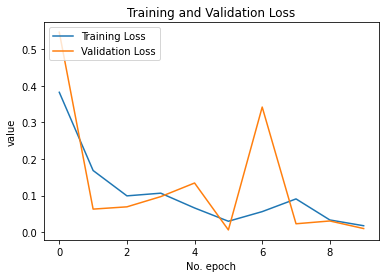

In [36]:
# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

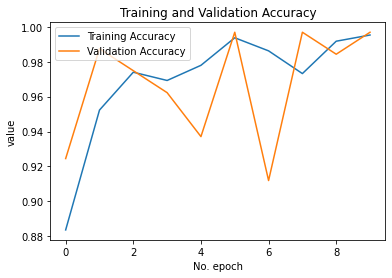

In [37]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [38]:
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')

Accuracy on training data: 0.9968 
Loss on training data: 0.0064 

Accuracy on test data: 1.0000 
Loss on test data: 0.0033 



In [39]:
MODEL_BASE_PATH = "/content/drive/MyDrive/"
PROJECT_NAME = "model_project"
SAVE_MODEL_NAME = "Model_Apel_Xception.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/model_project/Model_Apel_Xception.h5...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [40]:
import requests
from io import BytesIO

from PIL import Image
import numpy as np

In [41]:
# Parameters
input_size = (150,150)

#define input shape
channel = (3,)
input_shape = input_size + channel

#define labels
labels = ['Busuk Hitam', 'Karat Apel Cedar', 'Keropeng Apel', 'Sehat']

In [42]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [43]:
from tensorflow.keras.models import load_model

In [44]:
MODEL_PATH = '/content/drive/MyDrive/model_project/Model_Apel_Xception.h5'
model = load_model(MODEL_PATH,compile=False)

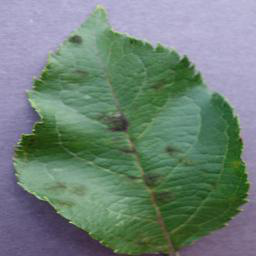

In [45]:
# read image
im = Image.open('/content/Home-Agriculture-Monitoring-System/ML/Data/Apel/Keropeng Apel/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG')
display(im)

In [46]:
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y)*100 , "%")

Keropeng Apel 99.99998807907104 %


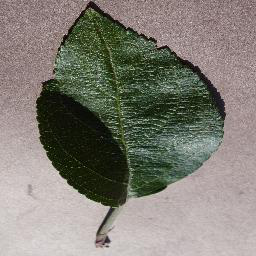

In [47]:
im = Image.open('/content/Home-Agriculture-Monitoring-System/ML/Data/Apel/Sehat/0055dd26-23a7-4415-ac61-e0b44ebfaf80___RS_HL 5672.JPG')
display(im)

In [48]:
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y)*100 , "%")

Sehat 99.99481439590454 %
